### References
[1] Online display of medical images. https://socr.umich.edu/HTML5/BrainViewer/    
[2] Convert medical images to PNG/JPG using med2image package. https://pypi.org/project/med2image/    
[3] Save imshow. https://stackoverflow.com/questions/31544130/saving-an-imshow-like-image-while-preserving-resolution  
[4] Denoising using open CV. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html

### Import libraries

In [1]:
import nibabel as nib      # Access to neuroimaging data formats
import med2image           # Convert medical images to jpg and png (pip install med2image)
import matplotlib.pyplot as plt
import cv2
from auxiliary_functions import *

### Load image

In [54]:
test_img = nib.load("file.nii.gz")
#test_img = nib.load("alzheimer_MR.nii")
print("Shape of the nii file:",test_img.get_fdata().shape)

Shape of the nii file: (256, 256, 124)


<div>
<img src="pictures/brain_planes.png" width="300"/>
</div>

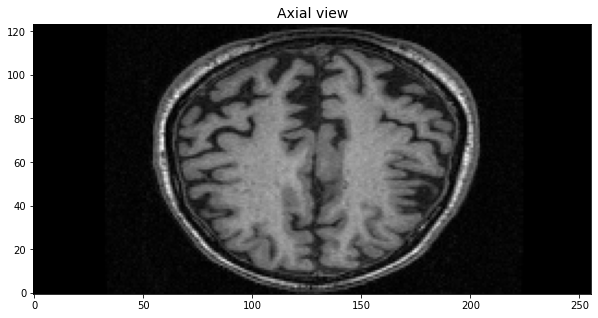

In [55]:
neuro_plot(test_img)

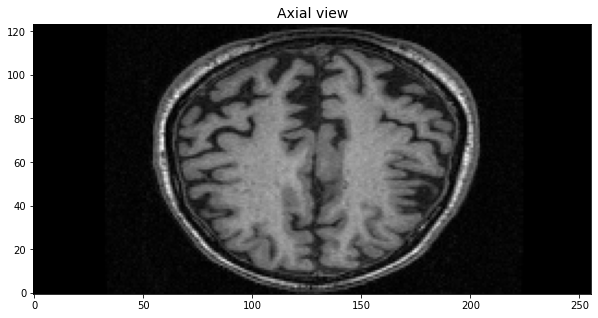

In [3]:
neuro_plot(test_img)

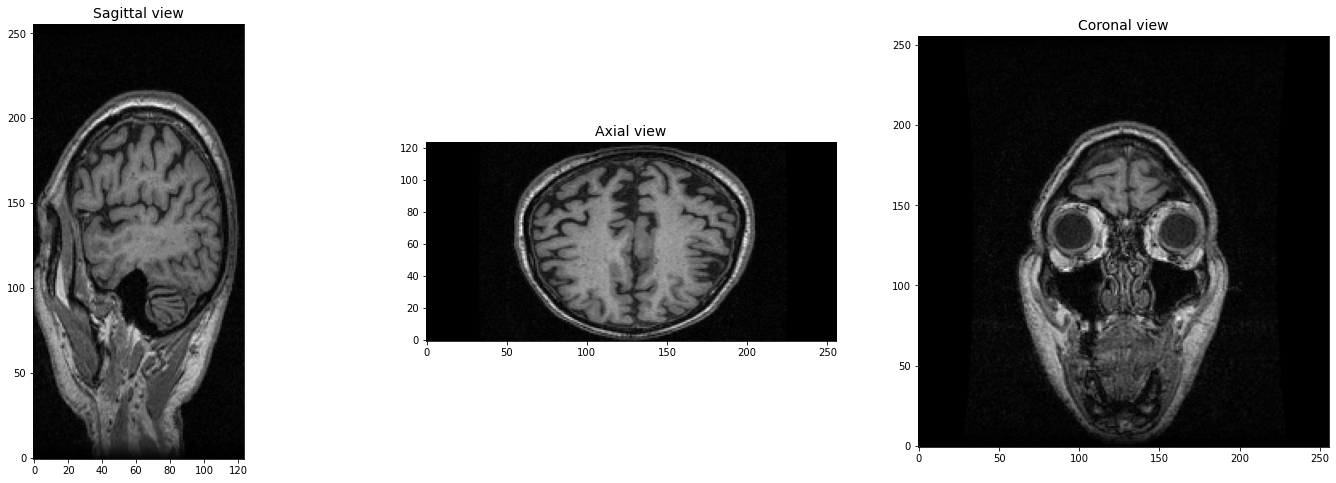

In [56]:
neuro_plot(test_img, view_ = "all", slice_ = [178,180,10])

In [17]:
img_data = test_img.get_fdata()

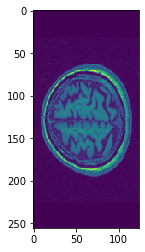

In [19]:
plt.imshow(img_data[:,200,:], interpolation='nearest')
plt.show()

In [24]:
np.save("image_data.txt",img_data)

In [22]:
import numpy as np

In [27]:
arr.shape

(5, 4, 3)

In [28]:
img_data.shape

(256, 256, 124)

In [30]:
arr.shape[2]

3

In [59]:
arr.shape

(256, 256, 124)

In [62]:
gzip < arr > arr.txt.gz

TypeError: '>' not supported between instances of 'float' and 'module'

In [63]:
f_out = gzip.GzipFile('array.npy.gz', "w")
np.save(f_out, arr)
f_out.close()

In [69]:
test_img.affine

array([[  -0.9375    ,    0.        ,    0.        ,  120.        ],
       [   0.        ,    0.        ,   -1.5       ,   89.19999695],
       [   0.        ,    0.9375    ,    0.        , -153.9624939 ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [70]:
print(test_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 124   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.      0.9375  0.9375  1.5     0.0143  1.      1.      1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : 0.70710677
qoffset_x       : 120.0
qoffset_y       : 89.2
qoffset_z       : -1

In [33]:
arr = img_data

# reshaping the array from 3D 
# matrice to 2D matrice. 
arr_reshaped = arr.reshape(arr.shape[0], -1) 

# saving reshaped array to file. 
np.savetxt("geekfile.txt", arr_reshaped) 

# retrieving data from file. 
loaded_arr = np.loadtxt("geekfile.txt") 

# This loadedArr is a 2D array, therefore 
# we need to convert it to the original 
# array shape.reshaping to get original 
# matrice with original shape. 
load_original_arr = loaded_arr.reshape( 
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2]) 

# check the shapes: 
print("shape of arr: ", arr.shape) 
print("shape of load_original_arr: ", load_original_arr.shape) 

# check if both arrays are same or not: 
if (load_original_arr == arr).all(): 
    print("Yes, both the arrays are same") 
else: 
    print("No, both the arrays are not same") 

shape of arr:  (256, 256, 124)
shape of load_original_arr:  (256, 256, 124)
Yes, both the arrays are same


In [34]:
import gzip

In [43]:
with open("alzheimer_MR.nii", 'rb') as f_ini:
    pass

In [45]:
f_out = gzip.open('alzheimer_MR.nii_2.gz', 'wb')

In [53]:
!gzip < alzheimer_MR.nii > file.nii.gz

In [48]:
f_ini = open("alzheimer_MR.nii") 
f_out = gzip.open('alzheimer_MR.nii.gz', 'wb')
f_out.writelines(f_ini)
f_out.close()
f_ini.close()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 78: invalid start byte

In [57]:
test_img

### Save specific slice

In [7]:
axial_view = test_img.get_fdata()[:, 180, :].T

In [8]:
plt.imsave('axial_img.png', axial_view, cmap="gray", origin="lower")

### Clean image

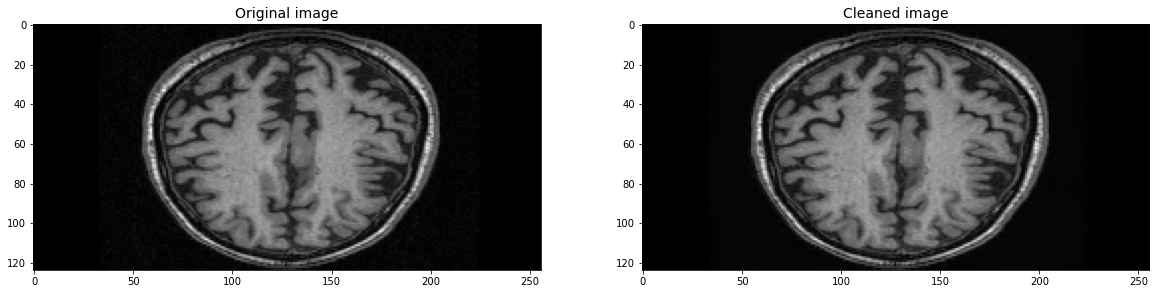

In [13]:
# Load original image
original_img = cv2.imread('axial_img.png')

# Clean image applying Denoising
cleaned_img = cv2.fastNlMeansDenoising(original_img, h=3)

# Visualize origina and cleaned images
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes[0].imshow(original_img)
axes[0].set_title("Original image", fontsize = 14)
axes[1].imshow(cleaned_img)
axes[1].set_title("Cleaned image", fontsize = 14)

# Save cleaned image
plt.imsave('axial_img_cleaned.png',cleaned_img)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# some data (512x512)
import scipy.misc
data = scipy.misc.lena()

# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=data.min(), vmax=data.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(data))

# save the image
plt.imsave('test.png', nii_img.get_fdata()[:, slice_, :].T)

### Modify image format using med2image package

In [ ]:
# Convert a NifTI file 'vol.nii' to JPEG and store
# the results in a dirctory called 'out'.
# The 'out' dir will contain a set of JPEG
# images of form 'output-sliceXXX.jpg'.

!med2image --inputFile alzheimer_MR.nii  \
           --outputDir middle_slice3      \
           --outputFileStem sample  --outputFileType jpg \
           --sliceToConvert m